# <b>取得股價資料</b>

## 使用 Yahoo Finance 取得資料

In [126]:
!pip install yfinance

In [127]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [128]:
# 輸入股票代號
stock_id = "0050.tw"
# stock_id = "2330.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=360)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-3572287934.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2024-09-25,46.609074,46.671136,46.509775,46.596660,46692004
1,2024-09-26,46.993862,47.167637,46.857323,47.068338,66903724
2,2024-09-27,46.894562,47.477953,46.820090,47.217288,45613256
3,2024-09-30,45.665718,46.472533,45.665718,46.311171,52747800
4,2024-10-01,45.578835,45.827085,45.516772,45.653307,37640876
...,...,...,...,...,...,...
236,2025-09-15,56.000000,56.049999,55.799999,56.000000,52544684
237,2025-09-16,56.750000,56.849998,56.150002,56.150002,63314427
238,2025-09-17,56.349998,56.599998,56.250000,56.599998,66204045
239,2025-09-18,56.950001,56.950001,56.250000,56.500000,44089588


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（SMA）

In [129]:
# 計算8日 SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# 計算13日 SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# 計算20日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()

# 列印最後筆數
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA
236,2025-09-15,56.000000,56.049999,55.799999,56.000000,52544684,54.35000,53.519231,53.1425
237,2025-09-16,56.750000,56.849998,56.150002,56.150002,63314427,54.90625,53.846154,53.3200
238,2025-09-17,56.349998,56.599998,56.250000,56.599998,66204045,55.34375,54.142308,53.5525
239,2025-09-18,56.950001,56.950001,56.250000,56.500000,44089588,55.79375,54.523077,53.8000
240,2025-09-19,57.000000,57.099998,56.599998,57.000000,73767380,56.18125,54.907692,54.0625


## 1.2 計算相對強弱指數（RSI）

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-01.jpg" alt="rsi" width="500"/>

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-02.jpg" alt="rs" width="500"/>

In [130]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
236,2025-09-15,56.000000,56.049999,55.799999,56.000000,52544684,54.35000,53.519231,53.1425,0.000000,0.000000,0.000000,0.307143,0.075000,4.095240,80.373840
237,2025-09-16,56.750000,56.849998,56.150002,56.150002,63314427,54.90625,53.846154,53.3200,0.750000,0.750000,0.000000,0.342857,0.075000,4.571431,82.051290
238,2025-09-17,56.349998,56.599998,56.250000,56.599998,66204045,55.34375,54.142308,53.5525,-0.400002,0.000000,0.400002,0.342857,0.067857,5.052627,83.478248
239,2025-09-18,56.950001,56.950001,56.250000,56.500000,44089588,55.79375,54.523077,53.8000,0.600002,0.600002,0.000000,0.385714,0.067857,5.684208,85.039363
240,2025-09-19,57.000000,57.099998,56.599998,57.000000,73767380,56.18125,54.907692,54.0625,0.049999,0.049999,0.000000,0.389286,0.032143,12.111092,92.372870


## 1.3 計算平滑異同移動平均線（MACD）

In [131]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算8天的指數移動平均線（EMA），並將其存儲在 'EMA_8' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()

# 計算13天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_8'] - df['EMA_13']

# 顯示DataFrame的最後幾行數據
df.head(3)

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2024-09-25,46.609074,46.671136,46.509775,46.596660,46692004,NaN,NaN,NaN,NaN,0.000000,0.0000,NaN,NaN,NaN,NaN,46.609074,46.609074,0.000000
1,2024-09-26,46.993862,47.167637,46.857323,47.068338,66903724,NaN,NaN,NaN,0.384789,0.384789,0.0000,NaN,NaN,NaN,NaN,46.694582,46.664043,0.030539
2,2024-09-27,46.894562,47.477953,46.820090,47.217288,45613256,NaN,NaN,NaN,-0.099300,0.000000,0.0993,NaN,NaN,NaN,NaN,46.739022,46.696975,0.042047


# <b>2. 資料可視化</b>
K 線型態的捕捉

In [132]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib.pyplot as plt
from matplotlib import font_manager

# 加入自訂字體
font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
plt.rc('font', family='Taipei Sans TC Beta')

--2025-09-20 03:38:37--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.134.113, 74.125.134.138, 74.125.134.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-20 03:38:37--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.98.132, 2607:f8b0:400c:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   126MB/s    in 0.2s    

2025-09-20 03:38:

## 2.1 可視化收盤價折線圖

In [133]:
# 取得股票名稱
ticker = yf.Ticker(stock_id)

print(ticker.info.get("longName"))

Yuanta/P-shares Taiwan Top 50 ETF


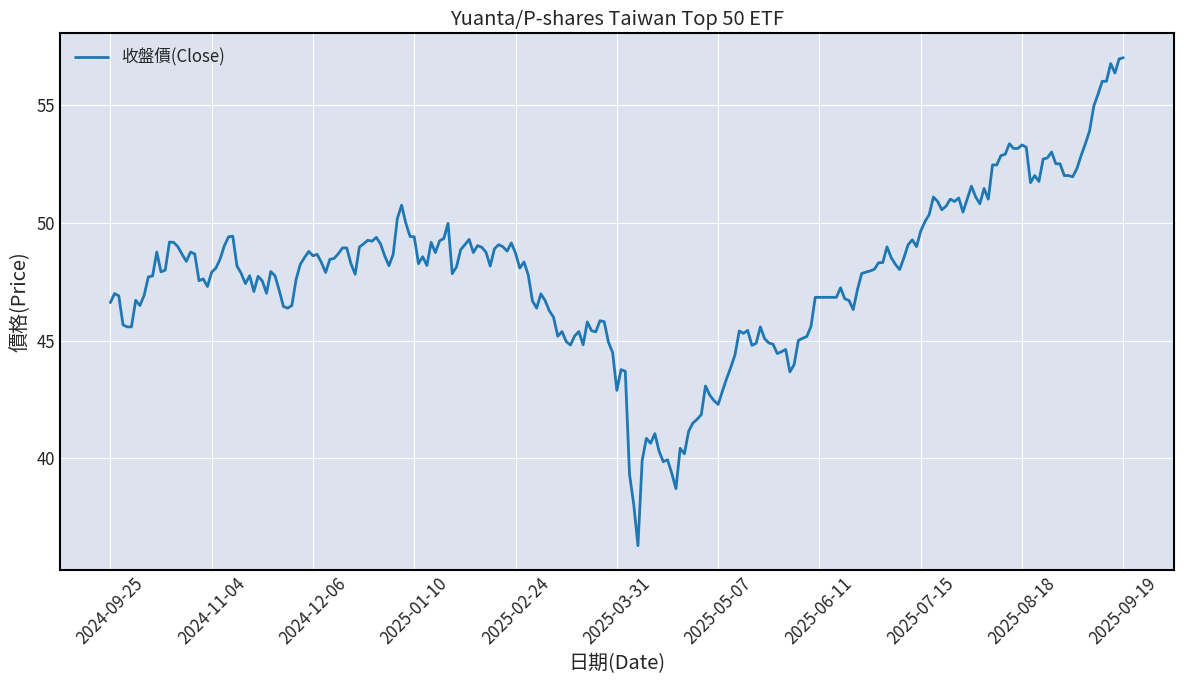

In [134]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='收盤價(Close)')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{ticker.info.get("longName")}')   # 將股票代號設為圖標
plt.xlabel('日期(Date)')         # x 軸標籤
plt.ylabel('價格(Price)')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 2.2 加入技術指標

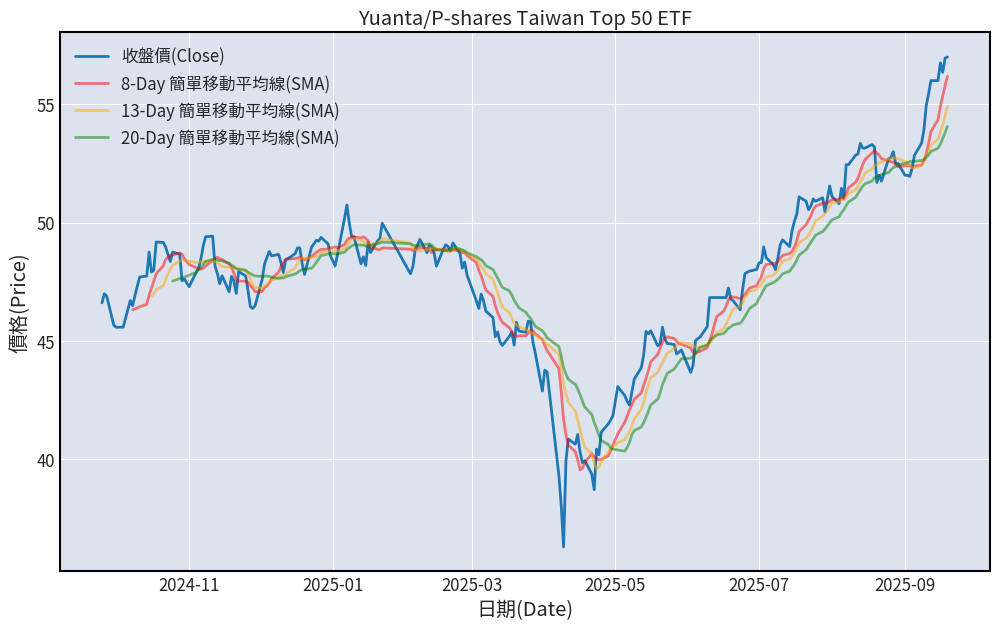

In [135]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='收盤價(Close)')

# 8 天的 SMA
plt.plot(df['Date'], df['8_SMA'], label='8-Day 簡單移動平均線(SMA)', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['13_SMA'], label='13-Day 簡單移動平均線(SMA)', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day 簡單移動平均線(SMA)', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{ticker.info.get("longName")}')
plt.xlabel('日期(Date)')
plt.ylabel('價格(Price)')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

In [136]:
!pip install mplfinance

In [137]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2025-08-01':'2025-09-19'].tail()

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,
2025-09-15,56.000000,56.049999,55.799999,56.000000,52544684,54.35000,53.519231,53.1425,0.000000,0.000000,0.000000,0.307143,0.075000,4.095240,80.373840,54.679531,54.072396,0.607135
2025-09-16,56.750000,56.849998,56.150002,56.150002,63314427,54.90625,53.846154,53.3200,0.750000,0.750000,0.000000,0.342857,0.075000,4.571431,82.051290,55.139635,54.454911,0.684724
2025-09-17,56.349998,56.599998,56.250000,56.599998,66204045,55.34375,54.142308,53.5525,-0.400002,0.000000,0.400002,0.342857,0.067857,5.052627,83.478248,55.408605,54.725638,0.682967
2025-09-18,56.950001,56.950001,56.250000,56.500000,44089588,55.79375,54.523077,53.8000,0.600002,0.600002,0.000000,0.385714,0.067857,5.684208,85.039363,55.751137,55.043404,0.707733
2025-09-19,57.000000,57.099998,56.599998,57.000000,73767380,56.18125,54.907692,54.0625,0.049999,0.049999,0.000000,0.389286,0.032143,12.111092,92.372870,56.028662,55.322917,0.705745


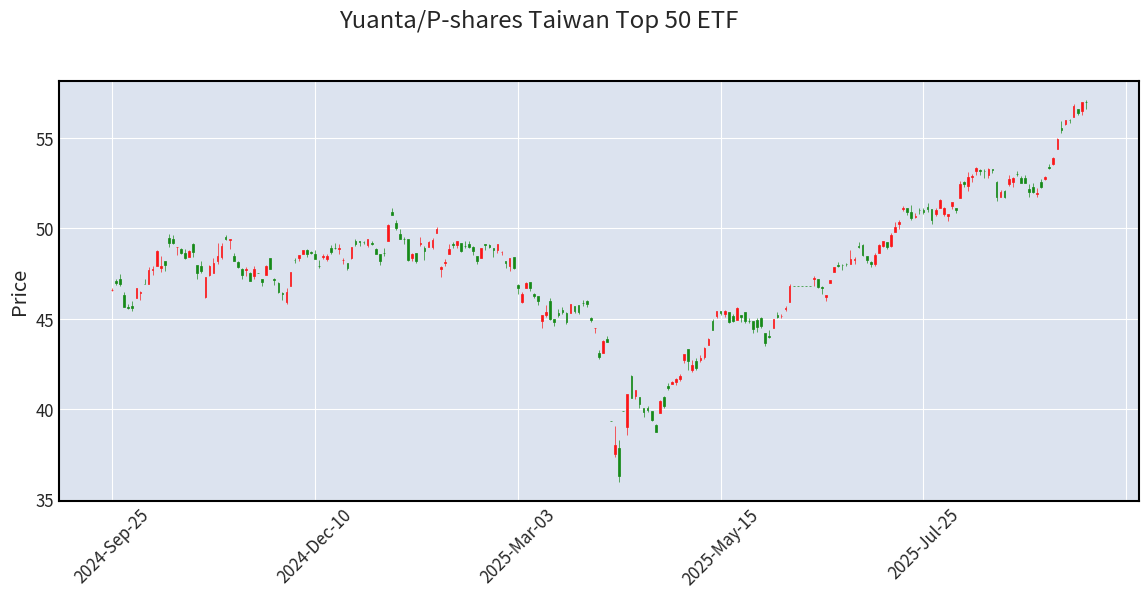

In [138]:
import matplotlib as mpl
from matplotlib import font_manager as fm
import mplfinance as mpf

# 1) 載入並註冊中文字型，取得正確的註冊名稱
font_path = "TaipeiSansTCBeta-Regular.ttf"   # 你的字型檔
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()

# 2) 重建字型快取，避免還在用舊的 Liberation Sans
mpl.font_manager._load_fontmanager(try_read_cache=False)

# 3) 準備給 mplfinance 的 rc（這很關鍵！）
rc_fonts = {
    "font.family": "sans-serif",
    "font.sans-serif": [font_name, "Noto Sans CJK TC", "Microsoft JhengHei", "Arial Unicode MS", "DejaVu Sans"],
    "axes.unicode_minus": False,  # 避免 Unicode 負號變豆腐
}

# 4) 你的顏色與樣式，將 rc 一起塞進去
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default', marketcolors=my_color, rc=rc_fonts)

# 5) 清理標題中容易缺字的符號（® ™ – — −）
title_text = (ticker.info.get("longName") or ticker.info.get("shortName") or stock_id).translate({
    0x2013: ord('-'),  # – → -
    0x2014: ord('-'),  # — → -
    0x2212: ord('-'),  # − → -
    0x2122: None,      # ™ 刪除
    0x00AE: None,      # ® 刪除
})

# import mplfinance as mpf
# 設置繪圖風格
# my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
# my_style = mpf.make_mpf_style(base_mpf_style='default',
#                 marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{ticker.info.get("longName")}', figsize=(15, 6))

## 2.4 捕捉 Hammer 型態

錘形線（Hammer）

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [139]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

#print('df',df)
# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-22,48.979870,48.979870,48.495782,48.955043,33857660,48.427510,47.591573,NaN,-0.186188,0.000000,...,0.333365,0.184414,1.807695,64.383592,48.384868,47.967310,0.417558,0.024827,0.459262,0.0
2024-11-11,49.426720,49.426720,48.855742,49.364657,49456052,48.398030,48.397433,48.444267,0.024826,0.024826,...,0.186188,0.167569,1.111111,52.631567,48.736388,48.511359,0.225029,0.062063,0.508915,0.0
2024-12-25,49.252941,49.277768,49.017104,49.277768,23624492,48.742478,48.594124,48.315176,0.148949,0.148949,...,0.181755,0.148064,1.227545,55.107519,48.767115,48.604096,0.163019,0.024827,0.235837,0.0
2025-02-18,49.066753,49.128816,48.806093,49.128816,32278676,48.858845,48.825188,48.809195,0.173775,0.173775,...,0.242931,0.254457,0.954703,48.841336,48.831871,48.849893,-0.018022,0.062063,0.260660,0.0
2025-02-20,48.793682,48.892981,48.433719,48.892981,55359052,48.827814,48.822324,48.856984,-0.186188,0.000000,...,0.189734,0.273962,0.692557,40.917796,48.848964,48.857778,-0.008814,0.099299,0.359963,0.0
2025-05-22,45.082333,45.194045,44.834082,45.194045,33358772,45.110260,44.286020,43.391123,-0.496502,0.000000,...,0.287262,0.143631,2.000002,66.666688,44.833027,44.321618,0.511409,0.111712,0.248251,0.0


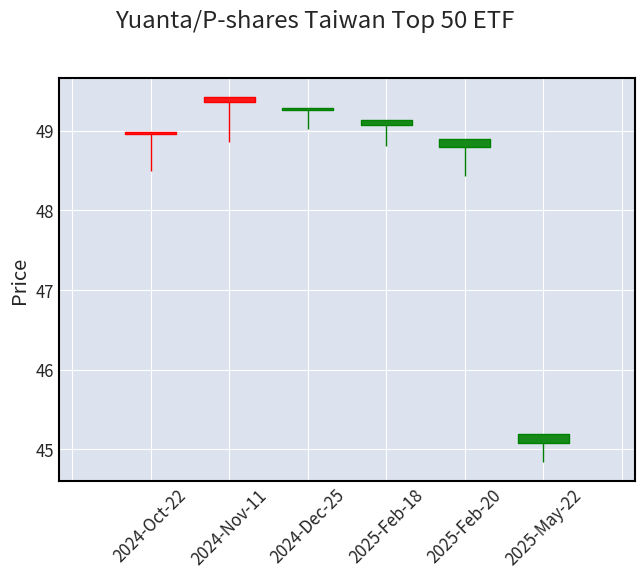

In [140]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{ticker.info.get("longName")}')

## 2.5 捕捉 Doji 型態

十字線（Doji）

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [141]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,Change,Gain,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2024-09-25,46.609074,46.671136,46.509775,46.596660,46692004,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,46.609074,46.609074,0.000000,0.012413,0.086885,0.062063
2024-10-09,46.919388,47.217288,46.919388,46.919388,45188240,46.353065,NaN,NaN,0.434441,0.434441,...,NaN,NaN,NaN,NaN,46.447526,46.449009,-0.001483,0.000000,0.000000,0.297900
2024-10-22,48.979870,48.979870,48.495782,48.955043,33857660,48.427510,47.591573,NaN,-0.186188,0.000000,...,0.333365,0.184414,1.807695,64.383592,48.384868,47.967310,0.417558,0.024827,0.459262,0.000000
2024-11-20,47.527599,47.527599,47.527599,47.527599,312000,47.867394,48.137725,48.133953,-0.198601,0.000000,...,0.222539,0.228746,0.972867,49.312351,47.775819,47.908095,-0.132276,0.000000,0.000000,0.000000
2024-12-03,48.235115,48.371654,48.098576,48.235115,39812424,47.242114,47.309905,47.737994,0.645451,0.645451,...,0.268643,0.241158,1.113971,52.695652,47.358279,47.418737,-0.060458,0.000000,0.136539,0.136539
2024-12-11,47.887562,48.222702,47.813090,47.912388,26858756,48.322003,47.751027,47.659795,-0.422031,0.000000,...,0.242044,0.179095,1.351483,57.473651,48.133484,48.008495,0.124989,0.024827,0.074472,0.310313
2024-12-17,48.930218,49.166055,48.843328,48.930218,37176916,48.498882,48.277127,47.888186,0.248249,0.248249,...,0.250911,0.073589,3.409632,77.322368,48.485060,48.311847,0.173213,0.000000,0.086889,0.235837
2024-12-19,48.259937,48.359240,48.048926,48.247528,52180188,48.491124,48.516784,48.021000,-0.670280,0.000000,...,0.242931,0.116146,2.091597,67.654257,48.511974,48.380150,0.131823,0.012410,0.198601,0.099303
2024-12-25,49.252941,49.277768,49.017104,49.277768,23624492,48.742478,48.594124,48.315176,0.148949,0.148949,...,0.181755,0.148064,1.227545,55.107519,48.767115,48.604096,0.163019,0.024827,0.235837,0.000000


In [142]:
doji_df.index

DatetimeIndex(['2024-09-25', '2024-10-09', '2024-10-22', '2024-11-20',
               '2024-12-03', '2024-12-11', '2024-12-17', '2024-12-19',
               '2024-12-25', '2025-01-03', '2025-01-10', '2025-01-16',
               '2025-02-11', '2025-02-24', '2025-03-25', '2025-03-28',
               '2025-04-07', '2025-04-10', '2025-05-26', '2025-06-06',
               '2025-06-11', '2025-06-12', '2025-06-13', '2025-06-16',
               '2025-06-17', '2025-06-27', '2025-06-30', '2025-07-03',
               '2025-07-24', '2025-08-15', '2025-08-27', '2025-09-15',
               '2025-09-19'],
              dtype='datetime64[ns]', name='Date', freq=None)

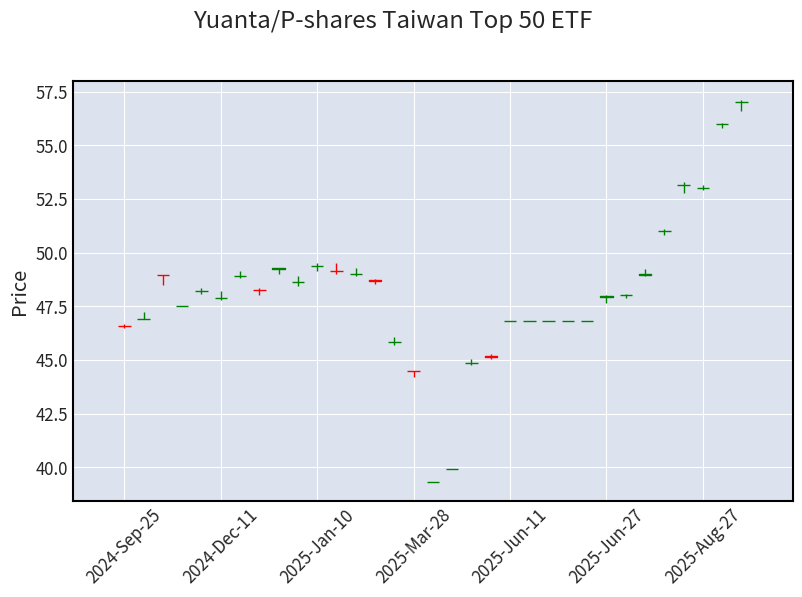

In [143]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{ticker.info.get("longName")}', figsize=(10, 6))

# <b>3. 機器學習預測股價漲跌</b>
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

## 3.1 資料前處理

In [144]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [145]:
# 標籤: 預測未來1天的價格，舉例說明:用技術指標預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((221, 3), (221,))

In [146]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((176, 3), (45, 3), (176,), (45,))

## 3.2 線性回歸（Linear Regression）

In [147]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 0.80
線性回歸模型預測未來1天的價格: 56.30


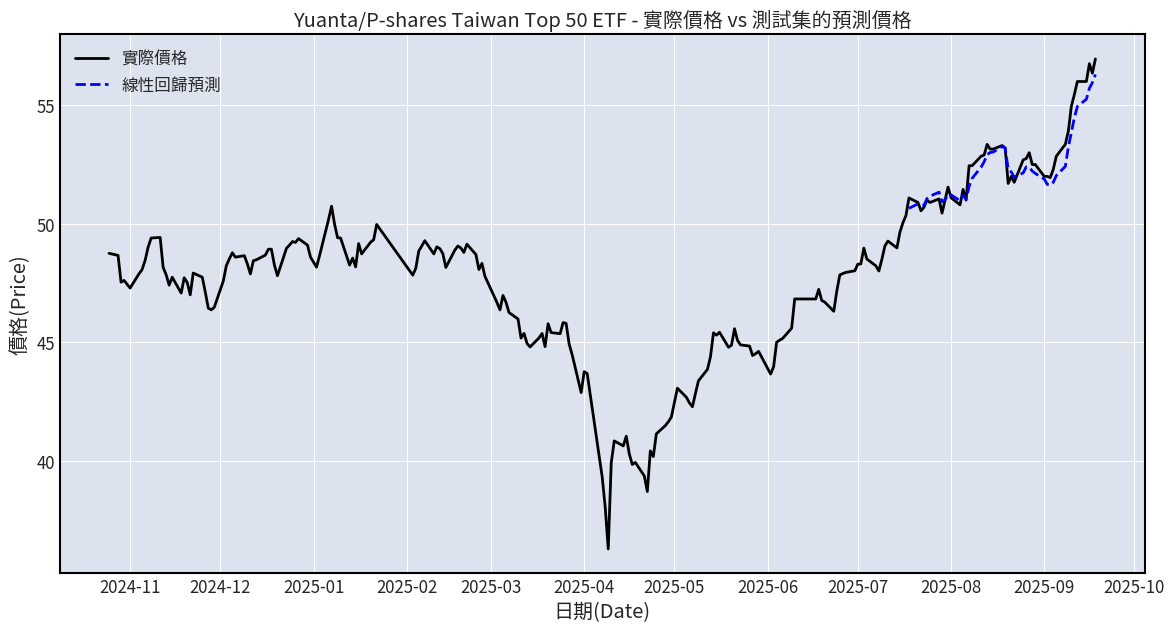

In [148]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='實際價格', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='線性回歸預測', linestyle='--', color='blue')
plt.xlabel('日期(Date)')
plt.ylabel('價格(Price)')
plt.title(ticker.info.get("longName") + ' - 實際價格 vs 測試集的預測價格')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 決策樹（Decision Tree）

In [149]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 3.15
決策樹模型預測未來1天的價格: 51.09


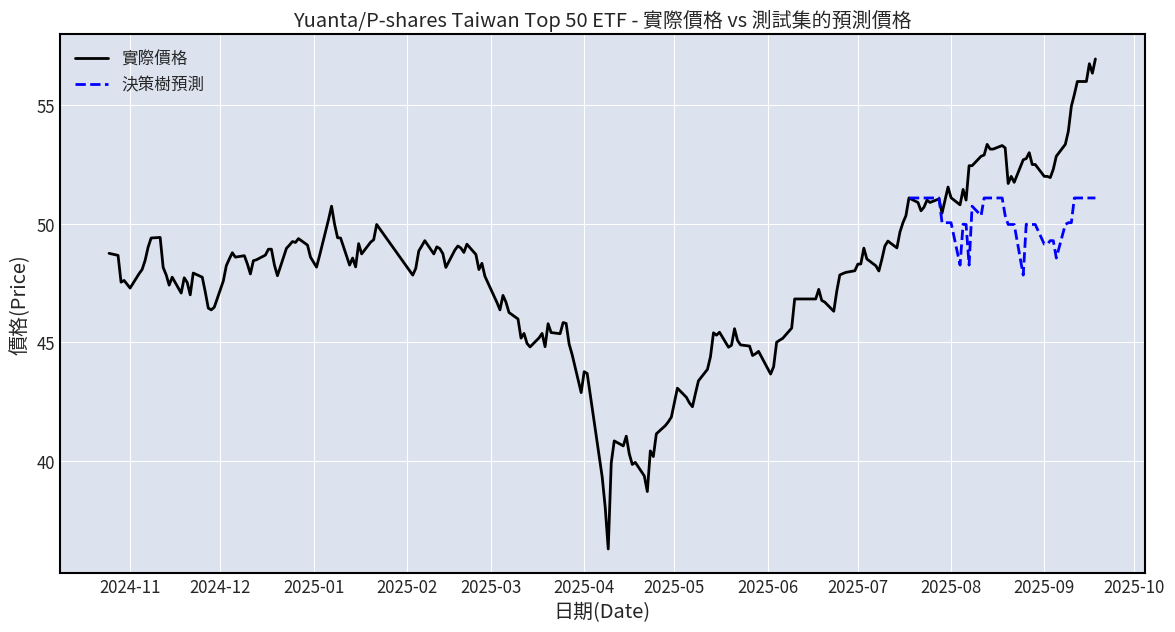

In [150]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='實際價格', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='決策樹預測', linestyle='--', color='blue')
plt.xlabel('日期(Date)')
plt.ylabel('價格(Price)')
plt.title(ticker.info.get("longName") + ' - 實際價格 vs 測試集的預測價格')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 隨機森林（Random Forest）

In [151]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 3.59
隨機森林模型預測未來1天的價格: 50.42


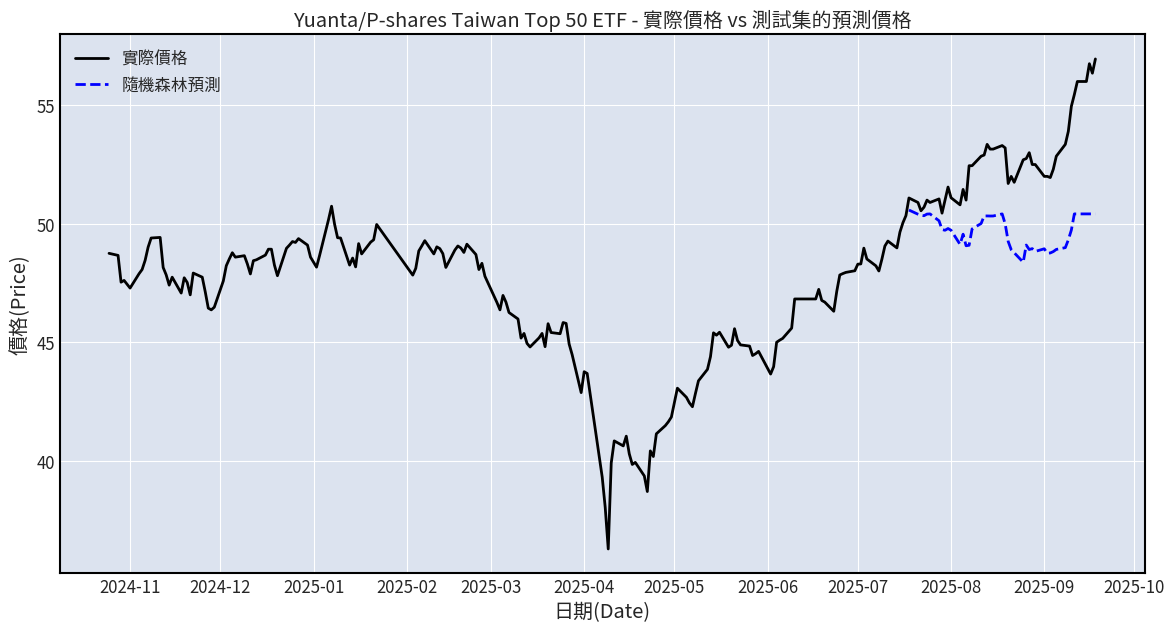

In [152]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='實際價格', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='隨機森林預測', linestyle='--', color='blue')
plt.xlabel('日期(Date)')
plt.ylabel('價格(Price)')
plt.title(ticker.info.get("longName") + ' - 實際價格 vs 測試集的預測價格')
plt.legend()
plt.grid(True)
plt.show()

# Pandas Shift

In [153]:
temp_df = pd.DataFrame({
    'Date': ['2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16'],
    'Close': [111, 222, 333, 444, 555, 666]
})
temp_df

,Date,Close
0,2024-10-11,111
1,2024-10-12,222
2,2024-10-13,333
3,2024-10-14,444
4,2024-10-15,555
5,2024-10-16,666


In [154]:
temp_df['Future'] = temp_df['Close'].shift(-1)
temp_df

,Date,Close,Future
0,2024-10-11,111,222.0
1,2024-10-12,222,333.0
2,2024-10-13,333,444.0
3,2024-10-14,444,555.0
4,2024-10-15,555,666.0
5,2024-10-16,666,NaN


In [155]:
temp_df.dropna(inplace=True)
temp_df

,Date,Close,Future
0,2024-10-11,111,222.0
1,2024-10-12,222,333.0
2,2024-10-13,333,444.0
3,2024-10-14,444,555.0
4,2024-10-15,555,666.0


In [156]:
sk_df = pd.DataFrame({
    'Date': ['2024-10-11', '2024-10-12', '2024-10-13', '2024-10-14', '2024-10-15', '2024-10-16'],
    '技術指標1': [111, 222, 333, 444, 555, 666],
    '技術指標2': [111, 222, 333, 444, 555, 666],
    '技術指標3': [111, 222, 333, 444, 555, 666],
    '技術指標4': [111, 222, 333, 444, 555, 666],
    'Close': [356, 363, 368, 370, 374, 366]
})
sk_df

,Date,技術指標1,技術指標2,技術指標3,技術指標4,Close
0,2024-10-11,111,111,111,111,356
1,2024-10-12,222,222,222,222,363
2,2024-10-13,333,333,333,333,368
3,2024-10-14,444,444,444,444,370
4,2024-10-15,555,555,555,555,374
5,2024-10-16,666,666,666,666,366


In [157]:
n = 3
sk_df.iloc[-n:]

,Date,技術指標1,技術指標2,技術指標3,技術指標4,Close
3,2024-10-14,444,444,444,444,370
4,2024-10-15,555,555,555,555,374
5,2024-10-16,666,666,666,666,366
